Project: No-Show Appointment Project

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
Introduction:<br>
Let us analyse patient's appointments based on various aspects in the dataset<br>

In [1]:
import pandas as  pd 
import numpy  as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
Setting up the general properties:<br>

In [8]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<br>Data Cleaning:
Rephrasing column name or typos to our own convinence and dropping unncesessary columns and data which are not relevant for analysis:<br>

In [9]:
df.drop(['PatientId','AppointmentID','Neighbourhood'], axis=1, inplace=True)
df = df.rename(columns = {'Hipertension':'Hypertension','SMS_received':'smsreceived','No-show':'noshow'}) 

<a id='eda'></a>
Data Analysis:<br>

<b>Does Age correlated with attendence of patients?</b><br>

In [12]:
def classify_age (age):
    if age['Age'] > 0 and age['Age'] <= 18 :
        return 'Child'
    elif age['Age'] > 18 and age['Age'] <= 60:
        return 'Adult'
    elif age['Age'] > 60:
        return 'Senior'
    
df['classify_age'] = df.apply(classify_age,axis=1)

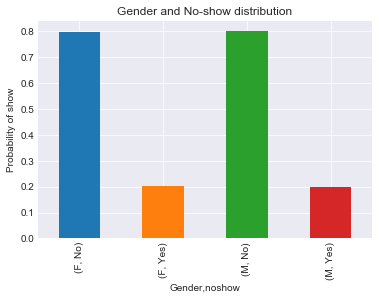

Gender  noshow
F       No        0.796854
        Yes       0.203146
M       No        0.800321
        Yes       0.199679
Name: noshow, dtype: float64


In [20]:
df.groupby('Gender')['noshow'].value_counts(normalize = True).plot(kind='bar')
plt.ylabel('Probability of show')
plt.title('Gender and No-show distribution')
plt.show()
print(df.groupby('Gender')['noshow'].value_counts(normalize = True))

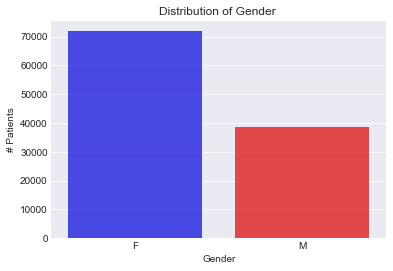

In [23]:
sns.set_style('darkgrid')
sns.countplot(df['Gender'], alpha =.80, palette= ['blue','red'])
plt.title('Distribution of Gender ')
plt.ylabel('# Patients')
plt.show()

<br>It can be seen Men are more likely to attend appointments than women may be because they are more cautious about their health than women but as seen from the mean, the difference is more liekly the same so it can be said that both men and women have same tendencies to attend their appointments<br>

<br><b>Does Age correlated with attendence of patients?</b><br>

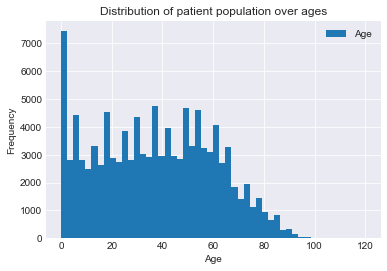

In [10]:
df.plot(kind = "hist",y = "Age",bins =50,range= (0,120)) 
plt.xlabel('Age')
plt.title('Distribution of patient population over ages')
plt.show()

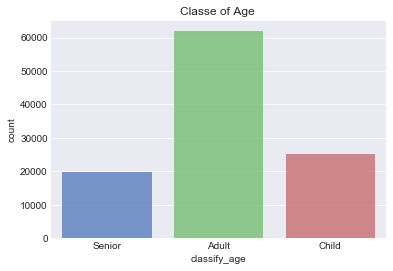

classify_age  noshow
Adult         No        0.790526
              Yes       0.209474
Child         No        0.774628
              Yes       0.225372
Senior        No        0.847890
              Yes       0.152110
Name: noshow, dtype: float64


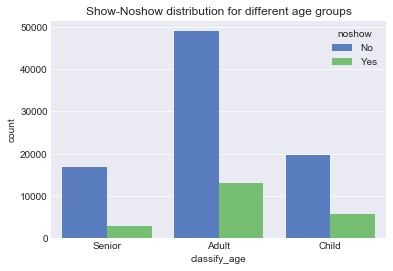

In [14]:
sns.set_style('darkgrid')

sns.countplot(df['classify_age'], alpha =.80,palette="muted")
plt.title('Classe of Age ')
plt.show()

print (df.groupby('classify_age')['noshow'].value_counts(normalize = True))

sns.set_style('darkgrid')
fig = sns.countplot(x='classify_age', data=df,hue='noshow', palette="muted");
plt.title('Show-Noshow distribution for different age groups')
plt.show()

<br>It can be seen that adults are more likely to attend the appointments than children and seniors. The reason for this may be because children are reluctant when it comes to hospitals and senior citizens maybe purposely avoiding their appointments thinking of their old age<br>

#  Does sms-remainder affect attendence of patient?

0    75045
1    35482
Name: smsreceived, dtype: int64
smsreceived  noshow
0            No        0.832967
             Yes       0.167033
1            No        0.724255
             Yes       0.275745
Name: noshow, dtype: float64


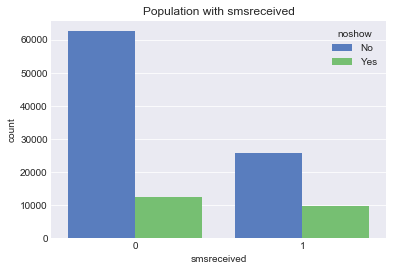

In [15]:
print(df["smsreceived"].value_counts())

print(df.groupby('smsreceived')['noshow'].value_counts(normalize = True))

sns.set_style('darkgrid')
fig = sns.countplot(x='smsreceived', data=df,hue='noshow', palette="muted");
plt.title('Population with smsreceived')
plt.show()

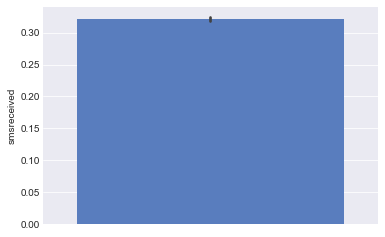

In [16]:
sns.set_style('darkgrid')
fig = sns.barplot(y='smsreceived', data=df,hue='noshow', palette="muted");
plt.show()

<br>It can be concluded that the patients receiving no sms remainder seems to have attended more than the patients who actually received sms for their appointment. Inferring from this statement, it can be said that it is not necessary that patients attend their appointment after remainder but it is necessary for them to actually feel like attending it for their own goodness

<a id='conclusions'></a>
## Conclusions
<br>
In conclusion, it can be said that middle aged patients are more likely to attend appointmens and also, kust remainder for patients it not necessary for them to show-up at apoointments, may the awareness should be made for the purpose

Limitations:
1) There are some negative values in age column which was difficult to plot since age cannot be negative and had to avoid it.
2) Due to some negative values, effective population cannot be plotted completely.